# Wstępna analiza daych

In [94]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [95]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features
y = heart_disease.data.targets

data = X.join(y)
  
print(heart_disease.variables) 


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [96]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


Zauważalne są brakującą dane ca oraz thal ze względu na to że wartość `ca` (liczbą głównych naczyń (0-3) zabarwionych fluorosopią) jest liczbą naturalną, uśrednianie nie wydaje się być najlepszą decyzją, zbadany zostanie rozkład a następnie zostanie podjęta decyzja w sprawie tej brakującej danej. Natomiast `thal` jest zmienną kategoryczną w której występują 3 typy danych (3, 4, 7) w objaśnieniu znaleziono wyjaśnienia tych wartości:
 - 3 = normal;
 - 6 = fixed defect;
 - 7 = reversable defect

Zmienną `thal` należy rozważyć pod kątem wpływu na wynik diagnozy i podjąć decyjzę o ewentualnym zastąpieniu brakujących wartości najbardziej popularnymi.

In [97]:
y.describe()

,num
count,303.000000
mean,0.937294
std,1.228536
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,4.000000


### Rozkład diagnoz

<Axes: title={'center': 'Rozkład diagnoz'}, ylabel='count'>

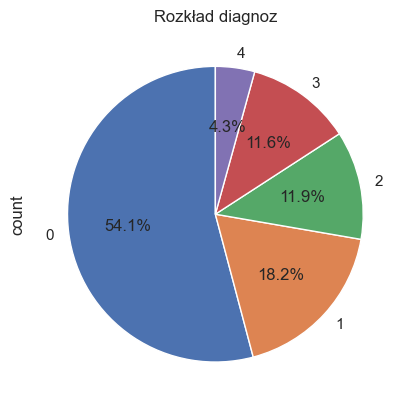

In [98]:
labels = y.value_counts().index

values_counts = y.value_counts()
values_counts.plot(kind='pie', labels=[x[0] for x in values_counts.index.tolist()], autopct='%1.1f%%', startangle=90, title='Rozkład diagnoz')

W przypadku większości innych badań na zbiorze danych ograniczono się jedynie do stwerdzenia istnienia choroby serca. Rożróznienie wartości 0 lub innej. W takim przypadku zbiór danych jest stosunkowo zbalasnowany. Natomiast w przypadku uwzględnienia klasyfikacji różnych chorób zbiór ten już nie jest zbalansowany. Co może skutkować niższą dokładnością modelu

# Korelacja

In [99]:
numerical_data = X[["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]]
categorical_data = X[["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]].join(y)

<Axes: title={'center': 'Korelacja atrybutów zbioru danych wraz z diagnozą (num)'}>

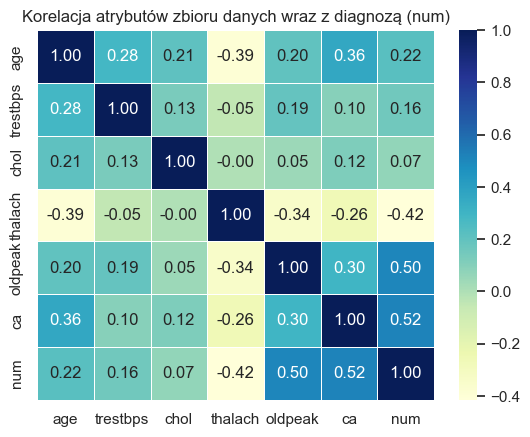

In [100]:
data = X.join(y)

plt.title("Korelacja atrybutów zbioru danych wraz z diagnozą (num)")
sns.heatmap(pd.DataFrame(numerical_data.join(y)).corr(), annot=True, fmt=".2f", linewidths=.5, cmap='YlGnBu')



# Rozkłady wartości ciągłych

Text(0.5, 1.0, 'Rozkład liczby głównych naczyń (0-3) zabarwionych fluorosopią (ca)')

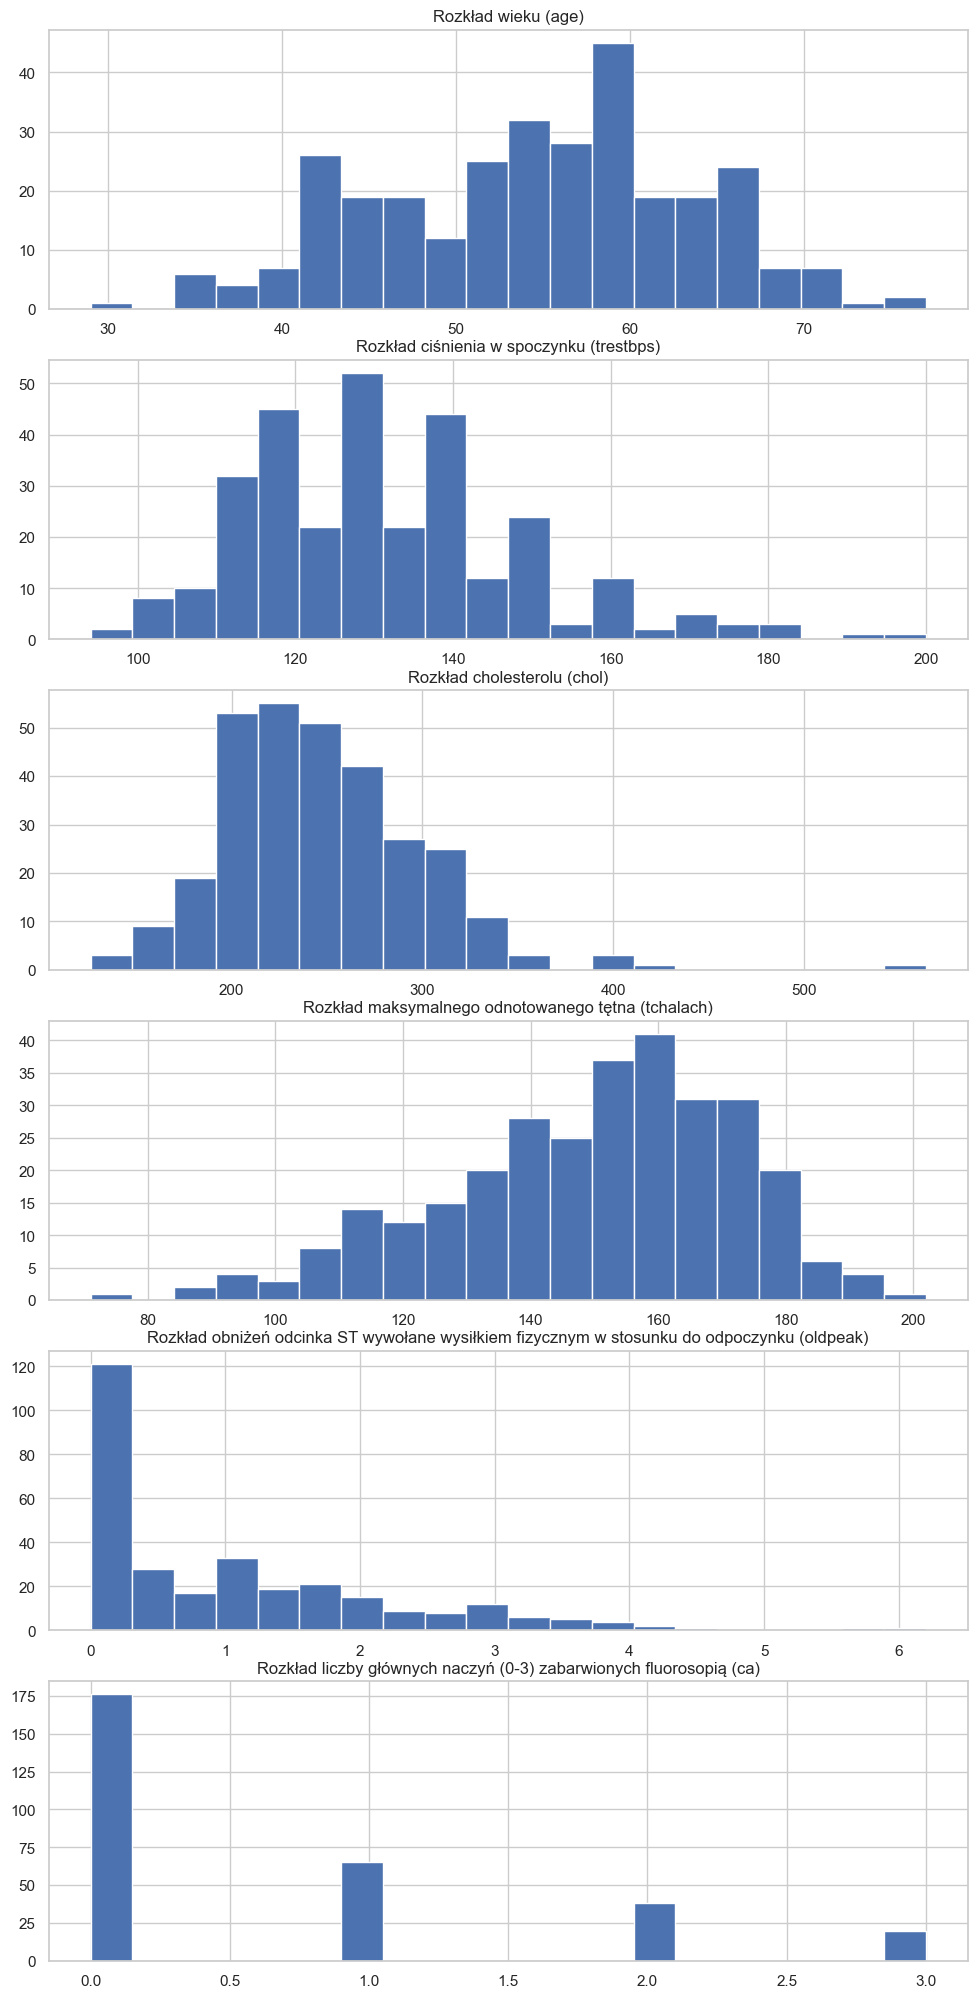

In [101]:
fig, ax = plt.subplots(6, 1, figsize=(10,20))
fig.tight_layout()
ax[0].hist(X.age, bins=20)
ax[0].set_title("Rozkład wieku (age)")
ax[1].hist(X.trestbps, bins=20)
ax[1].set_title("Rozkład ciśnienia w spoczynku (trestbps)")
ax[2].hist(X.chol, bins=20)
ax[2].set_title("Rozkład cholesterolu (chol)")
ax[3].hist(X.thalach, bins=20)
ax[3].set_title("Rozkład maksymalnego odnotowanego tętna (tchalach)")
ax[4].hist(X.oldpeak, bins=20)
ax[4].set_title("Rozkład obniżeń odcinka ST wywołane wysiłkiem fizycznym w stosunku do odpoczynku (oldpeak)")
ax[5].hist(X.ca, bins=20)
ax[5].set_title("Rozkład liczby głównych naczyń (0-3) zabarwionych fluorosopią (ca)")



### Uwagi
W przypadku cholesterolu zauważono wartość znacząco odstającą wynoszącą 564, ponad dwukrotnie większą od obserwowanej średniej. Zdecydowano się nie podejmować żadnych akcji, ze względu na niewielką korelację zmiennej `chol` z diagnozą. Podczas analizy wyników sieci w przyszłości, rozważona zostanie windoryzacja (*ang. Winsorizing*) 

## Testy na rozkład normalny
Przeprowadzono również testy statystynczne na rozkład normalny. Testem poddano zmienne: age, terstbps, chol, tchalach. Zdecydowano się przeprowadzić również test Shapiro-Wilka


In [102]:
from scipy.stats import normaltest

def test_normality(data, variable_name, alpha=0.05):
    stat, p = normaltest(data)
    print('='*12)
    print('Statystyka=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print(f'Zmienna numeryczna "{variable_name}" jest rozkładem normalnym na poziomie istotności alpha={alpha}')
    else:
        print(f'Zmienna numerczyna "{variable_name}" nie jest rozkładem normalnym na poziomie istotności alpha={alpha}')

for column in numerical_data.columns:
    test_normality(numerical_data[column], column)

Statystyka=8.243, p=0.016
Zmienna numerczyna "age" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=27.695, p=0.000
Zmienna numerczyna "trestbps" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=82.947, p=0.000
Zmienna numerczyna "chol" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=13.463, p=0.001
Zmienna numerczyna "thalach" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=66.620, p=0.000
Zmienna numerczyna "oldpeak" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=nan, p=nan
Zmienna numerczyna "ca" nie jest rozkładem normalnym na poziomie istotności alpha=0.05


Żadna ze zmiennych numerycznych nie okazała się rozkładem być rozkładem normalnym

# Rozkłady zmiennych kategorycznych

Text(0.5, 1.0, 'Rozkład diagnoz')

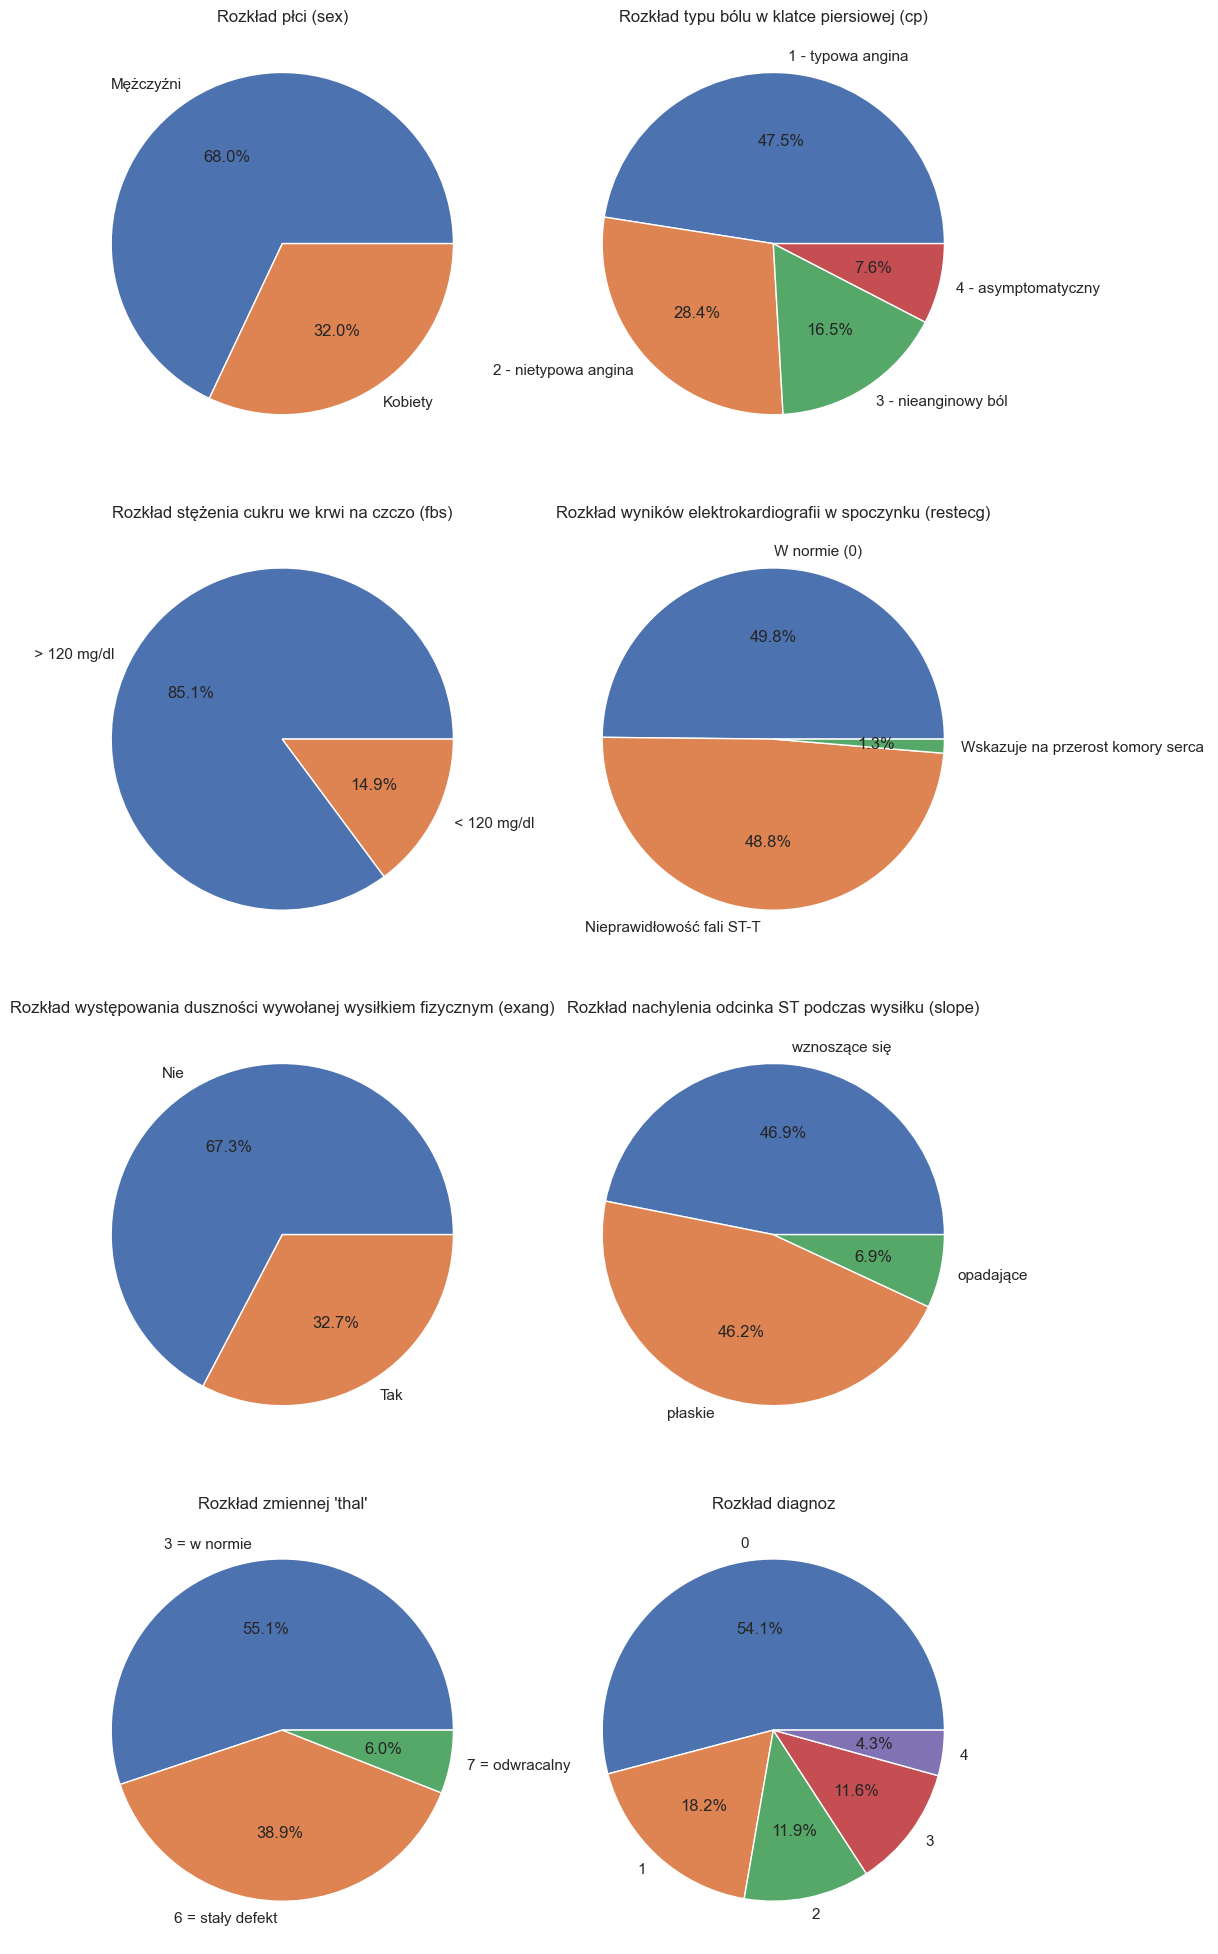

In [103]:
fig, ax = plt.subplots(4, 2, figsize=(10,20))
fig.tight_layout()
ax[0][0].pie(X['sex'].value_counts(), labels=['Mężczyźni', 'Kobiety'], autopct='%1.1f%%')
ax[0][0].set_title("Rozkład płci (sex)")
ax[0][1].pie(X['cp'].value_counts(), labels=['1 - typowa angina', '2 - nietypowa angina', '3 - nieanginowy ból ', '4 - asymptomatyczny'], autopct='%1.1f%%')
ax[0][1].set_title("Rozkład typu bólu w klatce piersiowej (cp)")
ax[1][0].pie(X['fbs'].value_counts(), labels=[' > 120 mg/dl', ' < 120 mg/dl'], autopct='%1.1f%%')
ax[1][0].set_title("Rozkład stężenia cukru we krwi na czczo (fbs)")
ax[1][1].pie(X['restecg'].value_counts(), labels=['W normie (0)', 'Nieprawidłowość fali ST-T ', 'Wskazuje na przerost komory serca '], autopct='%1.1f%%')
ax[1][1].set_title("Rozkład wyników elektrokardiografii w spoczynku (restecg)")
ax[2][0].pie(X['exang'].value_counts(), labels=['Nie', 'Tak'], autopct='%1.1f%%')
ax[2][0].set_title("Rozkład występowania duszności wywołanej wysiłkiem fizycznym (exang)")
ax[2][1].pie(X['slope'].value_counts(), labels=['wznoszące się', 'płaskie', 'opadające'], autopct='%1.1f%%')
ax[2][1].set_title("Rozkład nachylenia odcinka ST podczas wysiłku (slope)")
ax[3][0].pie(X['thal'].value_counts(), labels=["3 = w normie",  "6 = stały defekt",  "7 = odwracalny"], autopct='%1.1f%%')
ax[3][0].set_title("Rozkład zmiennej 'thal'")
ax[3][1].pie(y.value_counts(), labels=[x[0] for x in y.value_counts().index.tolist()], autopct='%1.1f%%')
ax[3][1].set_title("Rozkład diagnoz")

## Test V Crammera dla zmiennych kategorycznych i diagnoz

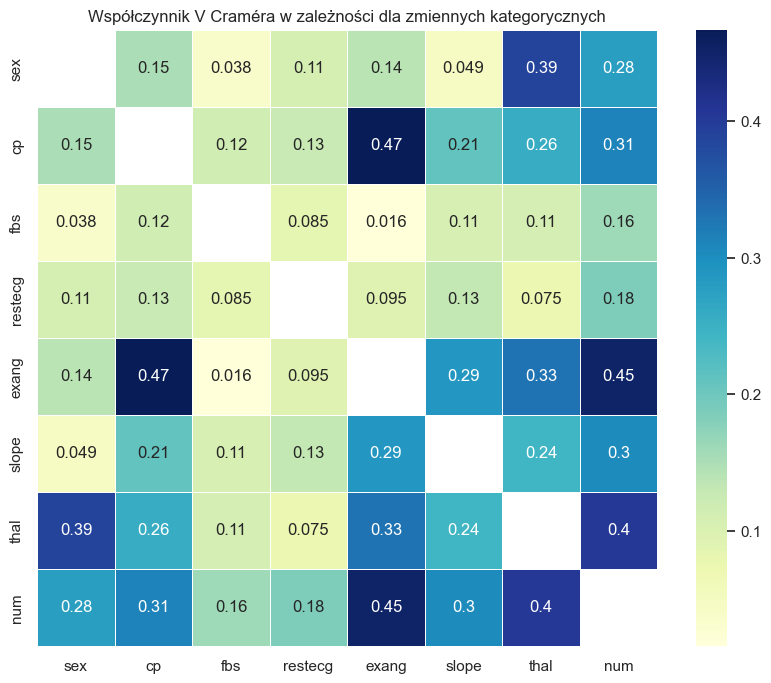

In [104]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

def calculate_association(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    cramers_v_value = cramers_v(contingency_table)
    return cramers_v_value

categorical_data_headers = categorical_data.columns
matrix = np.zeros((len(categorical_data_headers), len(categorical_data_headers)))

for i, var1 in enumerate(categorical_data_headers ):
    for j, var2 in enumerate(categorical_data_headers):
        if i != j:
            matrix[i, j] = calculate_association(categorical_data, var1, var2)
        else:
            matrix[i, j] = np.nan

cramers_v_df = pd.DataFrame(matrix, columns=categorical_data_headers, index=categorical_data_headers)

plt.figure(figsize=(10, 8))

sns.heatmap(cramers_v_df, annot=True, cmap="YlGnBu", cbar=True, linewidths=.5).axes.grid(False)
plt.title("Współczynnik V Craméra w zależności dla zmiennych kategorycznych")
plt.show()

W wyniku testu V Cramera zauważalny są średnie związki z diagnozą w przypadku zmiennych:
- `thal` - 0.4
- `exang` - 0.45 

Przy czym wykazują one nieco mniejszy związek ze sobą (0.33)
Nieco słabszy związek z diagnozą występuje w przypadku zmiennych:
- `cp` 0.31, przy czym wykazuje średni związek ze zmienną `exang` - 0.47 (największy z obserwowanych)
- `slope` - 0.3, wykazuje również słabe związki z pozostałymi zmiennymi (nieprzekraczające 0.29)
- `sex` - 0.28, przy czym wykazuje średni związek z `thal`

Najsłabsze związki z diagnozą dotyczą zmiennych:
- `fbs` - 0.16
- `restecg` - 0.18


# Wypełnienie brakujących danych 
Brakujące zmienne w przypadku `thal` oraz `ca` zdecydowano zastąpić modą, najpopularniejszą wartością

In [105]:
most_common_thal = X.thal.value_counts().idxmax()
X["thal"].fillna(most_common_thal, inplace=True)


most_common_ca = X.ca.value_counts().idxmax()
X["ca"].fillna(most_common_ca, inplace=True)

C:\Users\dawid\AppData\Local\Temp\ipykernel_7684\823200951.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["thal"].fillna(most_common_thal, inplace=True)
C:\Users\dawid\AppData\Local\Temp\ipykernel_7684\823200951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["thal"].fillna(most_common_thal, inplace=True)
C:\Users\dawid\AppData\Lo

# Kodowanie danych oraz reprezentacja w postaci macierzy
Zdecydowano się nie skalować kolumny ca, gdyż są to liczby całkowite z przedziału [0, 3], nie zakodowano ich również z użyciem OneHot.

W przypadku zmiennych kategorycznych wartości posiadających więcej niż 2 wartości zdecydowano się zastosować OneHotEncoding (zmienne te reprezentowane liczbowo nie tworzą logicznej sekwencji, mogą więc wpłynąć negatywnie na jakość modelu)

Zmienne kategoryczne z więcej niż jedną wartością:
- `cp`
- `restecg`
- `slope`
- `thal`

W przypadku zmiennych kategorycznych binarnych (0/1) pozostano przy obecnym kodowaniu, rozważa się również zastosowanie kodowania -1 dla 0, 1 dla 1

In [106]:
def min_max_scale(data: pd.DataFrame) -> pd.DataFrame:
    return (data - data.min()) / (data.max() - data.min())

def one_hot_encoding(data: pd.DataFrame) -> pd.DataFrame:
    return pd.get_dummies(data, dtype=int)


X_repr = X.copy()

# nie uwzględnia kolumny "ca" - mająca 4 wartości 0-3 - nie wymaga skalowania
data_to_min_max_scale = X_repr[["age", "trestbps", "chol", "thalach", "oldpeak"]]
X_scaled = min_max_scale(data_to_min_max_scale)

X_repr = X_repr.drop(columns=data_to_min_max_scale.columns).join(X_scaled)


cp_encoded = one_hot_encoding(X_repr["cp"].map({1: "cp typical angina", 2: "cp atypical angina", 3: "cp non-anginal pain", 4: "cp asymptomatic"}))
X_repr = X_repr.drop(columns=["cp"]).join(cp_encoded)


restecg_encoded = one_hot_encoding(X_repr["restecg"].map({0: "restecg normal", 1: "restecg ST-T wave abnormality", 2: "restecg left ventricular hypertrophy"}))
X_repr = X_repr.drop(columns=["restecg"]).join(restecg_encoded)


slope_encoded = one_hot_encoding(X_repr["slope"].map({1: "slope upsloping", 2: "slope flat", 3: "slope downsloping"}))
X_repr = X_repr.drop(columns=["slope"]).join(slope_encoded)

thal_encoded = one_hot_encoding(X_repr["thal"].map({3: "thal normal", 6: "thal fixed defect", 7: "thal reversable defect"}))
X_repr = X_repr.drop(columns=["thal"]).join(thal_encoded)

X_repr

,sex,fbs,exang,ca,age,trestbps,chol,thalach,oldpeak,cp asymptomatic,...,cp typical angina,restecg ST-T wave abnormality,restecg left ventricular hypertrophy,restecg normal,slope downsloping,slope flat,slope upsloping,thal fixed defect,thal normal,thal reversable defect
0,1,1,0,0.0,0.708333,0.481132,0.244292,0.603053,0.370968,0,...,1,0,1,0,1,0,0,1,0,0
1,1,0,1,3.0,0.791667,0.622642,0.365297,0.282443,0.241935,1,...,0,0,1,0,0,1,0,0,1,0
2,1,0,1,2.0,0.791667,0.245283,0.235160,0.442748,0.419355,1,...,0,0,1,0,0,1,0,0,0,1
3,1,0,0,0.0,0.166667,0.339623,0.283105,0.885496,0.564516,0,...,0,0,0,1,1,0,0,0,1,0
4,0,0,0,0.0,0.250000,0.339623,0.178082,0.770992,0.225806,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,0,0.0,0.333333,0.150943,0.315068,0.465649,0.193548,0,...,1,0,0,1,0,1,0,0,0,1
299,1,1,0,2.0,0.812500,0.471698,0.152968,0.534351,0.548387,1,...,0,0,0,1,0,1,0,0,0,1
300,1,0,1,1.0,0.583333,0.339623,0.011416,0.335878,0.193548,1,...,0,0,0,1,0,1,0,0,0,1
301,0,0,0,1.0,0.583333,0.339623,0.251142,0.786260,0.000000,0,...,0,0,1,0,0,1,0,0,1,0


In [110]:
X_np = X_repr.to_numpy()
X_np

array([[1., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])